In [1]:
#pip install summarytools

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn import metrics
import summarytools as st
from datetime import datetime

In [3]:
#I want to be able to view all columns at once so I use the set option fucntion in pandas library.
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

In [4]:
#storing dataset to variable
Prem_df = pd.read_csv("matches-1.csv")
Prem_df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,NaN,Fernandinho,4-2-3-1,Andre Marriner,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,NaN,Fernandinho,4-2-3-1,Michael Oliver,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,NaN,Kevin De Bruyne,4-3-3,Mike Dean,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,NaN,Raheem Sterling,4-3-3,Anthony Taylor,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


In [5]:
#sorting the order of the seasons into correct order
#Prem_df["season"] = Prem_df["season"].sort_values().reset_index(drop=True)

In [6]:
Prem_df["comp"].unique()

array(['Premier League'], dtype=object)

In [7]:
Prem_df.shape

(4788, 28)

In [8]:
Prem_df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,3155.000000,0.0,4788.000000,4788.000000,4786.000000,4788.000000,4788.000000,4788.00000,4788.000000
mean,63.044069,1.447995,1.405388,1.396512,1.364745,50.432957,38397.586688,NaN,12.619256,4.261278,17.356247,0.453216,0.118212,0.14599,2022.365079
std,42.865191,1.312635,1.286927,0.828847,0.814947,12.810958,17595.849137,NaN,5.548444,2.459963,3.049341,0.665250,0.342362,0.37937,1.461850
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000
25%,28.000000,0.000000,0.000000,0.800000,0.700000,41.000000,25513.500000,NaN,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000
50%,62.000000,1.000000,1.000000,1.300000,1.200000,51.000000,36347.000000,NaN,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000
75%,87.000000,2.000000,2.000000,1.900000,1.800000,60.000000,53235.500000,NaN,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000
max,182.000000,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000


In [9]:
Prem_df.isna().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [10]:
st.dfSummary(Prem_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unnamed: 0[int64],Mean (sd) : 63.0 (42.9)min < med < max:0.0 < 62.0 < 182.0IQR (CV) : 59.0 (1.5),182 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACv0lEQVR4nO3dPY7aQBiA4W/CggwothAr6LhApBSUNLlBDps2XZDgAtyABiFZxgiyiB87VTaKRAIee3bnM+9Trw3FK8+O7RlMnucC+O7De38B4B5Pt/7AGNMWkZbl+Y95nr9YHgu8+m+oxph2v9//GoZhz+bk2+02McZ8I1aUdeuK2grDsDeZTF6iKDoUOXGapsFsNuvFcdwSEXWhMpL45ebQLyISRdFhMBj8tDh/2+KYd8dI4p+7Qn1ADzuS+Kq2oZYcusMsy5pRFCWPNJL4rJahlh26T6dTcLlcPh0Ohx8iYhMqKlbLUKXE0C0islwue4vFonM+nxsuvhyKq2uoImI/CUyShKHbMzyZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKjhdM3W5XJoiEhpjbE/BjiMQEYeh7vf75ul0+jwajRqNRqPwSlARdhzBH85CPR6PT0EQdMbj8WE4HCZFj0/TNJhOp4M4jp+NMduCh4dZljWLfib85Xy5dLfbtVqyXOaKzAYS9ePtuv4yV2Q2kKgfb0P9zeaKzAYS9cPtKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSo4P2TKY1Kvt7Iq41XEGrFyr7eyKuN1xFqxcq8TMOPqf0boTpi+3qj8GNqVzGZggqEChUIFSrwP6pnWLl7HaF6pIqVu5vNZmeM+S4iNsd7GzmheqTsyt3VavVxPp9/GY1Gz3W7h0uoHrK9tZUkSbuu93AJtYbqeA+XWT9U4IqKVz7fcSBUiIj/e4URKkSkmr3CXE7GCBV/KTERE3E4GWMyBRW4oqIyLlc2ECoq4XplA6GiEq5XNhAqKuXqqRiTKahAqFDhrqE/TdOg6Il3u10gIrLf74P1et15y+O1frbW7132+Hv6+gXyOL2wcYRf6AAAAABJRU5ErkJggg=="">",0(0.0%)
2,date[object],1. 2021-05-232. 2020-07-263. 2020-10-044. 2020-12-165. 2021-05-196. 2020-12-267. 2021-01-308. 2020-01-019. 2019-12-2610. 2019-08-3111. other,"40 (0.8%)26 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)23 (0.5%)23 (0.5%)21 (0.4%)4,535 (94.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cwWoaUQCG0WuQ0GxGRPBhfIg8bB/CtxFxFk3Ixi5qd60JNP2k9pxVoZtZfIzTy/27OJ/PAwoPt34A/h9iIyM2MmIjIzYyYiMjNjJiIyM2MosxxtMYY5zP55cbPwt3brnZbJ7HGGOxWHwVHH/TwzRN62ma1mOMx1s/DPfNNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVnO83y8/Pntpk/C3bNBILPwX2ZR8WYjY11FxrqKjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxpuNjMELGYMXMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELGd9sZPyMkrGuImNdRcY3GxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMq6Fk7GuIuPNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYw3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMjYIZKyryHizkbGuImNdRcbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYxvNjJ+RslYV5GxriLjm42M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnXwslYV5HxZiNj8ELG4IWMow8yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2RcCydj8ELm55vNlXA+w9u1X8jlZrN5vmwQ4I/M83y8NpxaTtO03u12L6vV6rV+OO7H6XT6st/v14fD4XGM8evYxhhjtVq9brfbb+nTcY+erv2lczYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyyzF+XA+59YPwb/tIQ8t5no/7/X493rkeAu+5jKd+O5xyLZzPdPVauMELGf9AICM2MmIjIzYyYiMjNjJiIyM2MmIj8x0gQBAnkyXa7AAAAABJRU5ErkJggg=="">",0(0.0%)
3,time[object],1. 15:00 (17:00)2. 15:00 (16:00)3. 20:00 (22:00)4. 14:00 (16:00)5. 17:30 (19:30)6. 16:30 (18:30)7. 12:30 (14:30)8. 20:00 (21:00)9. 14:00 (15:00)10. 12:30 (13:30)11. other,"747 (15.6%)457 (9.5%)415 (8.7%)325 (6.8%)293 (6.1%)246 (5.1%)222 (4.6%)219 (4.6%)179 (3.7%)158 (3.3%)1,527 (31.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEO0lEQVR4nO3dTWojVwBG0VIwTXoiYQxejBeRxWYR2o0x1iDd9EQZZNj6K+nVDYXPWUDJg8sTVdRnbY7H4wSFP/7vP4CvQ2xkxEZGbGTERkZsZMRGRmxkxEZmM03T92mavi34Gb+Ox+OPBa/PSjy9vLz8td1un5f6gMPh8LHZbP4WHE/b7fb57e3tx263+zn64p+fn3/u9/vn9/f3b9M0ie2Le5qmadrtdj9fX1//Wegzvi90XVbGDQIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZF5mqb/3jtb4uJLXZd1ejocDh/7/f55Wui9s8Ph8DFN068lrs262CCQ2fiXWVQePdmcWtzsoXWV5RRz3L2uspxirkfXVZZT3MxDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyY

### deleting rows with non premier league teams !!!

In [11]:
Prem_df["opponent"].unique()

array(['Wolves', 'Leicester City', 'Leeds United', 'Arsenal', 'West Ham',
       'Sheffield Utd', 'Liverpool', 'Tottenham', 'Burnley', 'Fulham',
       'Manchester Utd', 'West Brom', 'Southampton', 'Newcastle Utd',
       'Chelsea', 'Brighton', 'Crystal Palace', 'Aston Villa', 'Everton',
       'Manchester City', 'Norwich City', 'Bournemouth', 'Watford',
       "Nott'ham Forest", 'Luton Town', 'Brentford'], dtype=object)

In [12]:
Prem_df["team"].unique()

array(['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton and Hove Albion', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United', 'Bournemouth',
       'Brentford', 'Nottingham Forest', 'Luton Town', 'Watford',
       'Norwich City'], dtype=object)

In [13]:
Prem_df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [14]:
PREM_df_Full=Prem_df[['date',  'round', 'venue', 'team','opponent','result',
             'formation','gf', 'ga', 'xg', 'xga', 'poss',
             'referee', 'sh', 'sot', 'dist',
               'fk', 'pk', 'pkatt']]

In [15]:
Prem_df.shape

(4788, 28)

In [16]:
Prem_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,NaN,Fernandinho,4-2-3-1,Andre Marriner,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,NaN,Fernandinho,4-2-3-1,Michael Oliver,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,NaN,Kevin De Bruyne,4-3-3,Mike Dean,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,NaN,Raheem Sterling,4-3-3,Anthony Taylor,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,1.2,56,NaN,Alexander Tettey,4-2-3-1,Anthony Taylor,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,3.5,53,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,2.5,33,NaN,Alexander Tettey,4-1-4-1,Jonathan Moss,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,1.8,42,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [17]:
#Prem_df["date"] = pd.to_datetime(Prem_df["date"], format='%Y-%m-%d', errors='coerce')

In [18]:
Prem_df['time'] = Prem_df["time"].str.split().str[0]
#Prem_df['time'] = pd.to_datetime(Prem_df["time"].str.split().str[0], format='%H:%M').dt.time

In [19]:
Prem_df['day'].unique()

array(['Mon', 'Sun', 'Sat', 'Tue', 'Wed', 'Fri', 'Thu'], dtype=object)

In [20]:
Prem_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,NaN,Fernandinho,4-2-3-1,Andre Marriner,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,NaN,Fernandinho,4-2-3-1,Michael Oliver,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,NaN,Kevin De Bruyne,4-3-3,Mike Dean,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,NaN,Raheem Sterling,4-3-3,Anthony Taylor,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,1.2,56,NaN,Alexander Tettey,4-2-3-1,Anthony Taylor,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,3.5,53,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,2.5,33,NaN,Alexander Tettey,4-1-4-1,Jonathan Moss,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,1.8,42,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [21]:
#Dropping colums that I know have no relevance based off CA2
drop_columns = Prem_df[["fk","season","pkatt","pk","Unnamed: 0","attendance", "notes","captain","formation", "referee", "match report","comp","round"]]
Prem_df.drop(drop_columns, axis=1, inplace=True)

In [22]:
Prem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      4788 non-null   object 
 1   time      4788 non-null   object 
 2   day       4788 non-null   object 
 3   venue     4788 non-null   object 
 4   result    4788 non-null   object 
 5   gf        4788 non-null   int64  
 6   ga        4788 non-null   int64  
 7   opponent  4788 non-null   object 
 8   xg        4788 non-null   float64
 9   xga       4788 non-null   float64
 10  poss      4788 non-null   int64  
 11  sh        4788 non-null   int64  
 12  sot       4788 non-null   int64  
 13  dist      4786 non-null   float64
 14  team      4788 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 561.2+ KB


In [23]:
Prem_df.drop_duplicates(subset = ["date", "team", "opponent", "result"],inplace=True)
Prem_df.reset_index(drop=True, inplace=True)

In [24]:
dropped_teams = Prem_df

In [25]:
# # #dropping teams that arent playing in the premeier league in 2024
# teamsDROP = ["Leeds United", "Burnley","West Brom", "West Bromwich Albion", "Sheffield United", "Luton Town", "Watford"]
# dropped_teams = prem_Team_Drop[~prem_Team_Drop['team'].isin(teamsDROP)]

In [26]:
# #dropping opponents that arent playing in the premeier league in 2024
# opponentsDROP = ["Leeds United", "Burnley", "West Brom", "Sheffield Utd", "Luton Town", "Watford"]
# dropped_teams['opponent'] = prem_Team_Drop[~prem_Team_Drop['opponent'].isin(opponentsDROP)]
# dropped_teams.reset_index(drop=True,inplace=True)

In [27]:
#Filling two nan values in distance col with mean
dist_mean=dropped_teams["dist"].mean()
dropped_teams["dist"].fillna(dist_mean, inplace=True)

In [28]:
dropped_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3800 non-null   object 
 1   time      3800 non-null   object 
 2   day       3800 non-null   object 
 3   venue     3800 non-null   object 
 4   result    3800 non-null   object 
 5   gf        3800 non-null   int64  
 6   ga        3800 non-null   int64  
 7   opponent  3800 non-null   object 
 8   xg        3800 non-null   float64
 9   xga       3800 non-null   float64
 10  poss      3800 non-null   int64  
 11  sh        3800 non-null   int64  
 12  sot       3800 non-null   int64  
 13  dist      3800 non-null   float64
 14  team      3800 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 445.4+ KB


In [29]:
MANU = "Manchester United"
WESTHam = 'West Ham United'
BHOVE = 'Brighton and Hove Albion'
WBROM = 'West Bromwich Albion'
WOLVES = 'Wolverhampton Wanderers'
SPURS = 'Tottenham Hotspur'
NEWC = 'Newcastle United'
NOTSF = 'Nottingham Forest'

dropped_teams["opponent"].replace({'Manchester Utd': MANU,'West Ham':WESTHam, 'Brighton':BHOVE,
                            'West Brom':WBROM, 'Wolves':WOLVES, 'Tottenham':SPURS,
                            'Newcastle Utd':NEWC,"Nott'ham Forest":NOTSF},inplace = True)

In [30]:
#sorting out the time and day feature
dropped_teams["DAY & TIME"] = dropped_teams['day'] + ' ' + dropped_teams['time']

colDROPPING = dropped_teams[['day','time']]
dropped_teams.drop(colDROPPING, axis=1, inplace=True)

In [31]:
#Seperating into seperate seasons

#season ranges
start_date_2019 = "2019-08-09" 
end_date_2020 = "2020-07-26"

start_date_2020 = "2020-09-12" 
end_date_2021 = "2021-05-23"

start_date_2021 = "2021-08-13" 
end_date_2022 = "2022-05-22"

start_date_2022 = "2022-08-05" 
end_date_2023 = "2023-05-28"

start_date_2023 = "2023-08-11" 
end_date_2024 = "2024-05-19"

#new datasets for each season
PL_Season_19_20 = dropped_teams[(dropped_teams["date"] >= start_date_2019) & (dropped_teams["date"] <= end_date_2020)] 
PL_Season_20_21 = dropped_teams[(dropped_teams["date"] >= start_date_2020) & (dropped_teams["date"] <= end_date_2021)] 
PL_Season_21_22 = dropped_teams[(dropped_teams["date"] >= start_date_2021) & (dropped_teams["date"] <= end_date_2022)] 
PL_Season_22_23 = dropped_teams[(dropped_teams["date"] >= start_date_2022) & (dropped_teams["date"] <= end_date_2023)] 
PL_Season_23_24 = dropped_teams[(dropped_teams["date"] >= start_date_2023) & (dropped_teams["date"] <= end_date_2024)] 
#PL_Season_23_24

In [32]:
All_years = pd.concat([PL_Season_19_20,PL_Season_20_21,PL_Season_21_22,PL_Season_22_23,PL_Season_23_24], axis = 0)
All_years.reset_index(drop=True, inplace=True)
All_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3800 non-null   object 
 1   venue       3800 non-null   object 
 2   result      3800 non-null   object 
 3   gf          3800 non-null   int64  
 4   ga          3800 non-null   int64  
 5   opponent    3800 non-null   object 
 6   xg          3800 non-null   float64
 7   xga         3800 non-null   float64
 8   poss        3800 non-null   int64  
 9   sh          3800 non-null   int64  
 10  sot         3800 non-null   int64  
 11  dist        3800 non-null   float64
 12  team        3800 non-null   object 
 13  DAY & TIME  3800 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 415.8+ KB


In [33]:
PL_Season_19_20["team"].unique()

array(['Liverpool', 'Manchester City', 'Manchester United', 'Chelsea',
       'Leicester City', 'Tottenham Hotspur', 'Wolverhampton Wanderers',
       'Arsenal', 'Sheffield United', 'Burnley', 'Southampton', 'Everton',
       'Newcastle United', 'Crystal Palace', 'Brighton and Hove Albion',
       'West Ham United', 'Aston Villa', 'Bournemouth', 'Watford',
       'Norwich City'], dtype=object)

In [34]:
season_league_finish_23_24 = { 'Manchester City': 1, 'Arsenal': 2, 'Liverpool': 3, 'Aston Villa': 4,
                        'Tottenham Hotspur':5, 'Chelsea': 6, "Newcastle United":7, "Manchester United":8,
                        'West Ham United':9, 'Crystal Palace': 10, 'Brighton and Hove Albion': 11,
                        'Bournemouth':12, 'Fulham':13, 'Wolverhampton Wanderers':14, "Everton": 15,"Brentford":16,
                        'Nottingham Forest':17,'Luton Town':18, 'Burnley':19, 'Sheffield Utd':20
                        } 


season_league_finish_22_23 = { 'Manchester City':1, 'Arsenal':2, 'Manchester United':3,
                       'Newcastle United':4, 'Liverpool':5, 'Brighton and Hove Albion':6,
                       'Aston Villa':7, 'Tottenham Hotspur':8, 'Brentford':9, 'Fulham':10,
                       'Crystal Palace':11, 'Chelsea':12, 'Wolverhampton Wanderers':13,
                       'West Ham United':14, 'Bournemouth':15, 'Nottingham Forest':16, 'Everton':17,
                       'Leicester City':18, 'Leeds United':19, 'Southampton':20
                        }

season_league_finish_21_22 = { 'Manchester City':1, 'Liverpool':2, 'Chelsea':3, 'Tottenham Hotspur':4,
                       'Arsenal':5, 'Manchester United':6, 'West Ham United':7,
                       'Leicester City':8, 'Brighton and Hove Albion':9,
                       'Wolverhampton Wanderers':10, 'Newcastle United':11, 'Crystal Palace':12,
                       'Brentford':13, 'Aston Villa':14, 'Southampton':15, 'Everton':16,
                       'Leeds United':17, 'Burnley':18, 'Watford':19, 'Norwich City':20
                        }

season_league_finish_20_21 = { 'Manchester City':1, 'Manchester United':2, 'Liverpool':3, 'Chelsea':4,
                        'Leicester City':5, 'West Ham United':6, 'Tottenham Hotspur':7,
                        'Arsenal':8, 'Leeds United':9, 'Everton':10, 'Aston Villa':11,
                        'Newcastle United':12, 'Wolverhampton Wanderers':13, 'Crystal Palace':14,
                        'Southampton':15, 'Brighton and Hove Albion':16, 'Burnley':17, 'Fulham':18,
                        'West Bromwich Albion':19, 'Sheffield Utd':20
                        } 

season_league_finish_19_20 = {'Liverpool':1, 'Manchester City':2, 'Manchester United':3, 'Chelsea':4,
                       'Leicester City':5, 'Tottenham Hotspur':6, 'Wolverhampton Wanderers':7,
                       'Arsenal':8, 'Sheffield Utd':9, 'Burnley':10, 'Southampton':11, 'Everton':12,
                       'Newcastle United':13, 'Crystal Palace':14, 'Brighton and Hove Albion':15,
                       'West Ham United':16, 'Aston Villa':17, 'Bournemouth':18, 'Watford':19,
                       'Norwich City':20
                        }


# ***** find a way to map all the postional data to the all years dataset

In [35]:
PL_Season_23_24['Premier League Finish Position'] = PL_Season_23_24['opponent'].map(season_league_finish_23_24)
PL_Season_22_23['Premier League Finish Position'] = PL_Season_22_23['opponent'].map(season_league_finish_22_23)
PL_Season_21_22['Premier League Finish Position'] = PL_Season_21_22['opponent'].map(season_league_finish_21_22)
PL_Season_20_21['Premier League Finish Position'] = PL_Season_20_21['opponent'].map(season_league_finish_20_21)
PL_Season_19_20['Premier League Finish Position'] = PL_Season_19_20['opponent'].map(season_league_finish_19_20)



#PL_Season_23_24['Last_Season_position'].unique()

In [36]:
p19_20 = PL_Season_19_20[['Premier League Finish Position']]
p20_21= PL_Season_20_21[['Premier League Finish Position']]
p21_22= PL_Season_21_22[['Premier League Finish Position']]
p22_23= PL_Season_22_23[['Premier League Finish Position']]
p23_24 = PL_Season_23_24[['Premier League Finish Position']]

In [37]:
# p19_20.reset_index(drop=True,inplace=True)
# p20_21.reset_index(drop=True,inplace=True)
# p21_22.reset_index(drop=True,inplace=True)
# p22_23.reset_index(drop=True,inplace=True)
# p23_24.reset_index(drop=True,inplace=True)

In [38]:
p21_22

,Premier League Finish Position
2508,4
2509,20
2510,5
2511,8
2512,15
...,...
3263,14
3264,7
3265,8
3266,10


In [39]:
prem_finish_combin= pd.concat([p19_20 ,p20_21,p21_22,p22_23,p23_24], axis=0)
prem_finish_combin.reset_index(drop=True,inplace=True)
prem_finish_combin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Premier League Finish Position  3800 non-null   int64
dtypes: int64(1)
memory usage: 29.8 KB


In [40]:
All_years_complete = pd.concat([All_years,prem_finish_combin], axis=1)

In [41]:
All_years_complete.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2019-08-09,Home,W,4,1,Norwich City,1.8,0.9,57,15,7,17.1,Liverpool,Fri 20:00,20
1,2019-08-17,Away,W,2,1,Southampton,1.3,1.9,63,15,6,18.6,Liverpool,Sat 15:00,11
2,2019-08-24,Home,W,3,1,Arsenal,2.5,1.0,52,24,4,18.8,Liverpool,Sat 17:30,8
3,2019-08-31,Away,W,3,0,Burnley,1.0,0.9,63,15,7,21.0,Liverpool,Sat 17:30,10
4,2019-09-14,Home,W,3,1,Newcastle United,3.0,0.3,74,21,8,13.6,Liverpool,Sat 12:30,13


In [42]:
# #sorting out the time and day feature
# dropped_teams["DAY & TIME"] = dropped_teams['day'] + ' ' + dropped_teams['time']

# colDROPPING = dropped_teams[['day','time']]
# dropped_teams.drop(colDROPPING, axis=1, inplace=True)

In [43]:
# dropped_teams.drop_duplicates(subset = ["date", "team", "opponent", "DAY & TIME", "result"],inplace=True)
# dropped_teams.reset_index(drop=True, inplace=True)

In [44]:
dropped_teams["opponent"].unique()

array(['Wolverhampton Wanderers', 'Leicester City', 'Leeds United',
       'Arsenal', 'West Ham United', 'Sheffield Utd', 'Liverpool',
       'Tottenham Hotspur', 'Burnley', 'Fulham', 'Manchester United',
       'West Bromwich Albion', 'Southampton', 'Newcastle United',
       'Chelsea', 'Brighton and Hove Albion', 'Crystal Palace',
       'Aston Villa', 'Everton', 'Manchester City', 'Norwich City',
       'Bournemouth', 'Watford', 'Nottingham Forest', 'Luton Town',
       'Brentford'], dtype=object)

In [45]:
dropped_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3800 non-null   object 
 1   venue       3800 non-null   object 
 2   result      3800 non-null   object 
 3   gf          3800 non-null   int64  
 4   ga          3800 non-null   int64  
 5   opponent    3800 non-null   object 
 6   xg          3800 non-null   float64
 7   xga         3800 non-null   float64
 8   poss        3800 non-null   int64  
 9   sh          3800 non-null   int64  
 10  sot         3800 non-null   int64  
 11  dist        3800 non-null   float64
 12  team        3800 non-null   object 
 13  DAY & TIME  3800 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 415.8+ KB


## ================================================================



# Enter Teams and Season Here:

In [46]:
Home_Team = 'Aston Villa'
Away_Team =  'Nottingham Forest'

Chosen_season = "Premier League Season 2023/2024"

# *======================================================*

In [47]:
#Defining a function to decide what season the data is pulled from

Seasons = ["Premier League Season 2019/2020", 
           "Premier League Season 2020/2021",
           "Premier League Season 2021/2022",
           "Premier League Season 2022/2023",
           "Premier League Season 2023/2024",
           "Premier League All Seasons from 2019-2024"]


def run_Season_dataset(Chosen_season):
        
    if Chosen_season == "Premier League Season 2019/2020":
        print("Running dataset containing data from 2019/2020 Season")
        return PL_Season_23_24
    
    elif Chosen_season == "Premier League Season 2020/2021":
        print("Running dataset containing data from 2020/2021 Season")
        return PL_Season_20_21
        
    elif Chosen_season == "Premier League Season 2021/2022":
        print("Running dataset containing data from 2021/2022 Season")
        return PL_Season_21_22
        
    elif Chosen_season == "Premier League Season 2022/2023":
        print("Running dataset containing data from 2022/2023 Season")
        return PL_Season_22_23
        
    elif Chosen_season == "Premier League Season 2023/2024":
        print("Running dataset containing data from 2023/2024 Season")
        return PL_Season_23_24
    
    else:
        print("Running dataset containing data from 2019 - 2024")
        return All_years_complete

# result = run_Season_dataset(Chosen_season) 
# print(result)

# Wins by day to give insight into how team may perform on a given day or time

In [48]:
Prem_df_Match_Times_analysis = dropped_teams
Prem_df_Match_Times_analysis

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15
1,2020-09-27,Home,L,2,5,Leicester City,0.9,2.9,72,16,5,19.8,Manchester City,Sun 16:30
2,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30
3,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30
4,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2020-07-07,Away,L,1,2,Watford,1.2,1.2,56,12,3,16.9,Norwich City,Tue 18:00
3796,2020-07-11,Home,L,0,4,West Ham United,0.6,3.5,53,11,2,19.8,Norwich City,Sat 12:30
3797,2020-07-14,Away,L,0,1,Chelsea,0.1,2.5,33,2,0,20.6,Norwich City,Tue 20:15
3798,2020-07-18,Home,L,0,2,Burnley,0.3,1.8,42,6,2,13.4,Norwich City,Sat 17:30


In [49]:
wins_time = Prem_df_Match_Times_analysis[["gf","ga","date","DAY & TIME","result","opponent","venue","team"]]

In [50]:
team = wins_time[(wins_time["team"] == Home_Team)];

In [51]:
#team["TIME and DAY"] = team['day'] + ' ' + team['time']

In [52]:
day_results = team.value_counts()
DF_day_results = pd.DataFrame(day_results)
DF_day_results.reset_index(inplace=True)
DF_day_results

,gf,ga,date,DAY & TIME,result,opponent,venue,team,count
0,0,0,2019-09-16,Mon 20:00,D,West Ham United,Home,Aston Villa,1
1,2,1,2021-05-19,Wed 18:00,W,Tottenham Hotspur,Away,Aston Villa,1
2,2,0,2023-02-25,Sat 15:00,W,Everton,Away,Aston Villa,1
3,2,0,2023-04-01,Sat 17:30,W,Chelsea,Away,Aston Villa,1
4,2,0,2023-04-08,Sat 15:00,W,Nottingham Forest,Home,Aston Villa,1
...,...,...,...,...,...,...,...,...,...
185,1,1,2022-05-15,Sun 14:00,D,Crystal Palace,Home,Aston Villa,1
186,1,1,2022-05-19,Thu 20:00,D,Burnley,Home,Aston Villa,1
187,1,1,2022-09-03,Sat 17:30,D,Manchester City,Home,Aston Villa,1
188,1,1,2022-10-10,Mon 20:00,D,Nottingham Forest,Away,Aston Villa,1


## Check teams record agaisnt particular opponents on particular day/time

In [53]:
#Insert team in the opponnent varibale depending on who team is playing
Opponent = Away_Team
opponent_day_stats = DF_day_results[(DF_day_results["opponent"] == Opponent)]
opponent_day_stats.drop(columns = "count",inplace=True)
print(Home_Team, "Record Vs", Away_Team)
opponent_day_stats.reset_index(drop=True,inplace=True)
opponent_day_stats

Aston Villa Record Vs Nottingham Forest


,gf,ga,date,DAY & TIME,result,opponent,venue,team
0,2,0,2023-04-08,Sat 15:00,W,Nottingham Forest,Home,Aston Villa
1,4,2,2024-02-24,Sat 15:00,W,Nottingham Forest,Home,Aston Villa
2,0,2,2023-11-05,Sun 14:00,L,Nottingham Forest,Away,Aston Villa
3,1,1,2022-10-10,Mon 20:00,D,Nottingham Forest,Away,Aston Villa


# *======================================================*

# Overall stats per year

In [54]:
Prem_df_stats = run_Season_dataset(Chosen_season)

Running dataset containing data from 2023/2024 Season


In [55]:
Prem_df_stats

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
988,2023-08-11,Away,W,3,0,Burnley,1.9,0.3,65,17,8,13.9,Manchester City,Fri 20:00,19
989,2023-08-19,Home,W,1,0,Newcastle United,1.0,0.3,59,14,4,17.9,Manchester City,Sat 20:00,7
990,2023-08-27,Away,W,2,1,Sheffield Utd,3.5,0.7,79,29,9,17.3,Manchester City,Sun 14:00,20
991,2023-09-02,Home,W,5,1,Fulham,2.2,1.4,68,6,4,14.8,Manchester City,Sat 15:00,13
992,2023-09-16,Away,W,3,1,West Ham United,3.6,0.9,68,29,13,16.4,Manchester City,Sat 15:00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,2024-04-24,Away,L,2,4,Manchester United,0.8,2.9,29,10,4,17.8,Sheffield United,Wed 20:00,8
1744,2024-04-27,Away,L,1,5,Newcastle United,1.5,3.1,40,15,4,13.5,Sheffield United,Sat 15:00,7
1745,2024-05-04,Home,L,1,3,Nottingham Forest,2.2,1.5,54,16,4,18.0,Sheffield United,Sat 15:00,17
1746,2024-05-11,Away,L,0,1,Everton,0.6,2.3,42,13,1,21.0,Sheffield United,Sat 15:00,15


In [56]:
# COLS_TO_DROP_XG = Prem_df_stats[["time","day","fk"]]
# Prem_df_stats.drop(COLS_TO_DROP_XG, axis=1, inplace = True)
# Prem_df_stats.head()

In [57]:
TEAM_HOME = Prem_df_stats[(Prem_df_stats["team"] == Home_Team)]

In [58]:
home = "Home"
TEAM_stats_home = TEAM_HOME[(TEAM_HOME["venue"] == home)]
TEAM_stats_home.reset_index(drop=True, inplace=True)
TEAM_stats_home=TEAM_stats_home.drop_duplicates(subset="date")
TEAM_stats_home.reset_index(drop=True, inplace=True)
TEAM_stats_home.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2023-08-20,Home,W,4,0,Everton,2.9,0.6,60,12,6,18.5,Aston Villa,Sun 14:00,15
1,2023-09-16,Home,W,3,1,Crystal Palace,3.0,1.2,66,15,4,16.2,Aston Villa,Sat 15:00,10
2,2023-09-30,Home,W,6,1,Brighton and Hove Albion,1.6,1.7,39,19,9,17.9,Aston Villa,Sat 12:30,11
3,2023-10-22,Home,W,4,1,West Ham United,1.9,1.1,58,14,6,19.6,Aston Villa,Sun 16:30,9
4,2023-10-29,Home,W,3,1,Luton Town,2.3,0.5,70,17,6,14.5,Aston Villa,Sun 14:00,18


In [59]:
TEAM_Away= Prem_df_stats[(Prem_df_stats["team"] == Away_Team)]
#TEAM_Away

In [60]:
away = "Away"
TEAM_stats_away = TEAM_Away[(TEAM_Away["venue"] == away)]
TEAM_stats_away.reset_index(drop=True, inplace=True)
TEAM_stats_away=TEAM_stats_away.drop_duplicates(subset="date")
TEAM_stats_away.reset_index(drop=True, inplace=True)
TEAM_stats_away.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2023-08-12,Away,L,1,2,Arsenal,1.2,0.8,22,6,2,17.3,Nottingham Forest,Sat 12:30,2
1,2023-08-26,Away,L,2,3,Manchester United,1.2,2.8,34,9,4,14.7,Nottingham Forest,Sat 15:00,8
2,2023-09-02,Away,W,1,0,Chelsea,0.8,2.3,25,7,3,19.0,Nottingham Forest,Sat 15:00,6
3,2023-09-23,Away,L,0,2,Manchester City,1.0,1.3,43,10,3,17.8,Nottingham Forest,Sat 15:00,1
4,2023-10-07,Away,D,0,0,Crystal Palace,1.0,0.8,48,16,5,18.4,Nottingham Forest,Sat 17:30,10


In [61]:
#Average amount of expected goals scored by away team in season
awayGames = TEAM_stats_away["opponent"].count()
totalXG_away = TEAM_stats_away["xg"].sum()
avgXG_Away = totalXG_away/awayGames

#Average amount of expected goals conceded by away team in season
totalXGa_away = TEAM_stats_away["xga"].sum()
avgXGa_Away = totalXGa_away/awayGames

#Average amount of actual goals scored by away team in season
totalGF_Away = TEAM_stats_away["gf"].sum()
avgGF_Away = totalGF_Away/awayGames

#Average amount of actual goals conceded by away team in season
totalGA_Away = TEAM_stats_away["ga"].sum()
avgGA_Away = totalGA_Away/awayGames

#Average possesion by away team in season
totalPossAway = TEAM_stats_away["poss"].sum()
avgPoss_Away = totalPossAway/awayGames

#Average shots/shots on target by away team in season
totalshotsAway = TEAM_stats_away["sh"].sum()
avgShots_Away = totalshotsAway/awayGames

totalshotsOnTargetAway = TEAM_stats_away["sot"].sum()
avgshotsOnTarget_Away = totalshotsOnTargetAway/awayGames

#Precentage of shot going on target
shotsPercentAway = avgshotsOnTarget_Away/avgShots_Away*100

#Average shooting distance
totalDistAway = TEAM_stats_away["dist"].sum()
avgDist_Away = totalDistAway/awayGames

In [62]:
#Average amount of expected goals scored by home team in season
homeGames = TEAM_stats_home["opponent"].count()
totalXG_Home = TEAM_stats_home["xg"].sum()
avgXG_Home = totalXG_Home/homeGames

#Average amount of expected goals conceded by home team in season
totalXGa_Home = TEAM_stats_home["xga"].sum()
avgXGa_Home = totalXGa_Home/homeGames

#Average amount of actual goals scored by home team in season
totalGF_Home = TEAM_stats_home["gf"].sum()
avgGF_Home = totalGF_Home/homeGames

#Average amount of actual goals conceded by home team in season
totalGA_Home = TEAM_stats_home["ga"].sum()
avgGA_Home = totalGA_Home/homeGames

#Average possesion by home team in season
totalPoss = TEAM_stats_home["poss"].sum()
avgPoss_Home = totalPoss/homeGames

#Average shots/shots on target by home team in season
totalshots = TEAM_stats_home["sh"].sum()
avgShots_Home = totalshots/homeGames

totalshotsOnTarget = TEAM_stats_home["sot"].sum()
avgshotsOnTarget_Home = totalshotsOnTarget/homeGames

#Precentage of shot going on target
shotsPercent = avgshotsOnTarget_Home/avgShots_Home*100

#Average shooting distance
totalDist = TEAM_stats_home["dist"].sum()
avgDist_Home = totalDist/homeGames

# ===========================================================

# Team vs Opponent Full Statistical Report

In [63]:
teamStats_VS_Record = dropped_teams#[["date","team","opponent","venue","result","gf","ga","formation","xg","xga","poss","sh","sot","dist","fk","pk","pkatt"]]
teamStats_VS_Record[["fk","pk","pkatt","formation"]] = PREM_df_Full[["fk","pk","pkatt","formation"]]

In [64]:
dropped_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3800 non-null   object 
 1   venue       3800 non-null   object 
 2   result      3800 non-null   object 
 3   gf          3800 non-null   int64  
 4   ga          3800 non-null   int64  
 5   opponent    3800 non-null   object 
 6   xg          3800 non-null   float64
 7   xga         3800 non-null   float64
 8   poss        3800 non-null   int64  
 9   sh          3800 non-null   int64  
 10  sot         3800 non-null   int64  
 11  dist        3800 non-null   float64
 12  team        3800 non-null   object 
 13  DAY & TIME  3800 non-null   object 
 14  fk          3800 non-null   int64  
 15  pk          3800 non-null   int64  
 16  pkatt       3800 non-null   int64  
 17  formation   3800 non-null   object 
dtypes: float64(3), int64(8), object(7)
memory usage: 534.5+ KB


In [65]:
teamStats_VS_Record["opponent"].unique()

array(['Wolverhampton Wanderers', 'Leicester City', 'Leeds United',
       'Arsenal', 'West Ham United', 'Sheffield Utd', 'Liverpool',
       'Tottenham Hotspur', 'Burnley', 'Fulham', 'Manchester United',
       'West Bromwich Albion', 'Southampton', 'Newcastle United',
       'Chelsea', 'Brighton and Hove Albion', 'Crystal Palace',
       'Aston Villa', 'Everton', 'Manchester City', 'Norwich City',
       'Bournemouth', 'Watford', 'Nottingham Forest', 'Luton Town',
       'Brentford'], dtype=object)

In [66]:
teamStats_VS_Record.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15,2,1,1,4-2-3-1
1,2020-09-27,Home,L,2,5,Leicester City,0.9,2.9,72,16,5,19.8,Manchester City,Sun 16:30,1,0,0,4-2-3-1
2,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30,1,0,0,4-3-3
3,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30,0,0,0,3-1-4-2
4,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30,1,0,0,4-3-3


In [67]:
# #Filling two nan values in distance col with mean
# dist_mean=teamStats_VS_Record["dist"].mean()
# teamStats_VS_Record["dist"].fillna(dist_mean, inplace=True)

In [68]:
teamStats_VS_Record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3800 non-null   object 
 1   venue       3800 non-null   object 
 2   result      3800 non-null   object 
 3   gf          3800 non-null   int64  
 4   ga          3800 non-null   int64  
 5   opponent    3800 non-null   object 
 6   xg          3800 non-null   float64
 7   xga         3800 non-null   float64
 8   poss        3800 non-null   int64  
 9   sh          3800 non-null   int64  
 10  sot         3800 non-null   int64  
 11  dist        3800 non-null   float64
 12  team        3800 non-null   object 
 13  DAY & TIME  3800 non-null   object 
 14  fk          3800 non-null   int64  
 15  pk          3800 non-null   int64  
 16  pkatt       3800 non-null   int64  
 17  formation   3800 non-null   object 
dtypes: float64(3), int64(8), object(7)
memory usage: 534.5+ KB


In [69]:
teamStats_VS_Record

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15,2,1,1,4-2-3-1
1,2020-09-27,Home,L,2,5,Leicester City,0.9,2.9,72,16,5,19.8,Manchester City,Sun 16:30,1,0,0,4-2-3-1
2,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30,1,0,0,4-3-3
3,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30,0,0,0,3-1-4-2
4,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30,1,0,0,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2020-07-07,Away,L,1,2,Watford,1.2,1.2,56,12,3,16.9,Norwich City,Tue 18:00,1,0,0,4-3-3
3796,2020-07-11,Home,L,0,4,West Ham United,0.6,3.5,53,11,2,19.8,Norwich City,Sat 12:30,1,0,1,4-3-3
3797,2020-07-14,Away,L,0,1,Chelsea,0.1,2.5,33,2,0,20.6,Norwich City,Tue 20:15,2,0,0,4-3-3
3798,2020-07-18,Home,L,0,2,Burnley,0.3,1.8,42,6,2,13.4,Norwich City,Sat 17:30,0,0,0,4-3-3


In [70]:
team__HOME = teamStats_VS_Record[(teamStats_VS_Record["team"] == Home_Team)];

In [71]:
team__VS = team__HOME[(team__HOME["opponent"] == Away_Team)];
team__VS_HOME = team__VS[(team__VS["venue"] == "Home")]
team__VS_HOME

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
1127,2024-02-24,Home,W,4,2,Nottingham Forest,3.6,2.6,58,16,6,14.3,Aston Villa,Sat 15:00,2,0,0,4-2-3-1
2005,2023-04-08,Home,W,2,0,Nottingham Forest,1.3,0.2,63,8,3,12.4,Aston Villa,Sat 15:00,0,0,0,4-4-2


In [72]:
team__AWAY = teamStats_VS_Record[(teamStats_VS_Record["team"] == Away_Team)];
team__AWAY

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
1596,2023-08-12,Away,L,1,2,Arsenal,1.2,0.8,22,6,2,17.3,Nottingham Forest,Sat 12:30,0,0,0,3-4-3
1597,2023-08-18,Home,W,2,1,Sheffield Utd,1.4,0.5,50,16,4,15.6,Nottingham Forest,Fri 19:45,0,0,0,3-4-3
1598,2023-08-26,Away,L,2,3,Manchester United,1.2,2.8,34,9,4,14.7,Nottingham Forest,Sat 15:00,0,0,0,3-4-3
1599,2023-09-02,Away,W,1,0,Chelsea,0.8,2.3,25,7,3,19.0,Nottingham Forest,Sat 15:00,0,0,0,3-4-3
1600,2023-09-18,Home,D,1,1,Burnley,0.7,0.5,46,14,4,18.8,Nottingham Forest,Mon 19:45,0,0,0,4-2-3-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2023-04-29,Away,L,1,2,Brentford,0.7,1.6,32,5,3,16.6,Nottingham Forest,Sat 15:00,0,0,0,3-4-3
2352,2023-05-08,Home,W,4,3,Southampton,1.8,3.1,36,8,3,16.0,Nottingham Forest,Mon 20:00,0,1,1,4-3-3
2353,2023-05-13,Away,D,2,2,Chelsea,1.3,1.2,25,11,2,11.2,Nottingham Forest,Sat 15:00,0,0,0,3-4-3
2354,2023-05-20,Home,W,1,0,Arsenal,0.6,0.6,19,6,2,13.5,Nottingham Forest,Sat 17:30,0,0,0,3-4-3


In [73]:
opponent__VS = team__AWAY[(team__AWAY["opponent"] == Home_Team)];
team__VS_AWAY = opponent__VS[(opponent__VS["venue"] == "Away")]
team__VS_AWAY

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
1621,2024-02-24,Away,L,2,4,Aston Villa,2.6,3.6,42,10,3,16.4,Nottingham Forest,Sat 15:00,0,0,0,4-2-3-1
2347,2023-04-08,Away,L,0,2,Aston Villa,0.2,1.3,37,6,2,22.0,Nottingham Forest,Sat 15:00,0,0,0,3-4-3


In [74]:
#AWAY_Team_PERF = Prem_df[Prem_df["Venue"] == "Home"].groupby("Team")["Result"].apply(lambda x: (x == "W").sum())

In [75]:
HOME_mean = team__VS_HOME[["gf","ga","xg","xga", "poss","sh","sot","dist"]].mean()
HOME_mean

gf       3.00
ga       1.00
xg       2.45
xga      1.40
poss    60.50
sh      12.00
sot      4.50
dist    13.35
dtype: float64

In [76]:
AWAY_mean = team__VS_AWAY[["gf","ga","xg","xga", "poss","sh","sot","dist"]].mean()
AWAY_mean

gf       1.00
ga       3.00
xg       1.40
xga      2.45
poss    39.50
sh       8.00
sot      2.50
dist    19.20
dtype: float64

In [77]:
Home_record = team__VS_HOME["result"].value_counts()
Away_record = team__VS_AWAY["result"].value_counts()

In [78]:
#full record of matches - time and day etc.
print('\033[1m',Home_Team, "Record Vs", Away_Team,'\033[0m')
print("\n")
print(opponent_day_stats)
print("\n")

#HOME VS AWAY statistical stuff
print('\033[1m', Home_Team, "overall Home stats VS", Away_Team, "from 2019 - 2024:", '\033[0m',)
print(("\n"))
print(HOME_mean)
print("\n")
print(Home_record)
print("\n")
print('\033[1m', Away_Team, "overall Away stats VS", Home_Team, "from 2019 - 2024:", '\033[0m',)
print(("\n"))

#Home vs away results count
print(AWAY_mean)
print("\n")
print(Away_record)
print("\n")

#Overall home stats
print('\033[1m',Home_Team, "HOME STATS for: ", Chosen_season,'\033[0m')
print("\n")
print("Average Home Xg for Season: {:.2f}".format(avgXG_Home))
print("Average Home Xga for Season: {:.2f}".format(avgXGa_Home))
print("=====================================================")
print("Average of Actual Home Goals Scored for Season: {:.2f}".format(avgGF_Home))
print("Average of Actual Home Goals Conceded: {:.2f}".format(avgGA_Home))
print("=====================================================")
print("Average Home Possession for Season: {:.0f}".format(avgPoss_Home),"%")
print("=====================================================")
print("Average Home Shots for Season: {:.0f}".format(avgShots_Home))
print("Average Home Shots on Target for Season: {:.0f}".format(avgshotsOnTarget_Home))
print("Average Home Shots on Target Percentage: {:.0f}".format(shotsPercent),"%")
print("Average Home Shots Distance From Goal: {:.2f}".format(avgDist_Home),"Metres")
print("\n")

#Overall away stats
print('\033[1m', Away_Team, "AWAY STATS for:", Chosen_season,'\033[0m')
print("\n")
print("Average Away Xg for Season: {:.2f}".format(avgXG_Away))
print("Average Away Xga for Season: {:.2f}".format(avgXGa_Away))
print("=====================================================")
print("Average of Actual Away Goals Scored for Season: {:.2f}".format(avgGF_Away))
print("Average of Actual Away Goals Conceded: {:.2f}".format(avgGA_Away))
print("=====================================================")
print("Average Away Possession for Season: {:.0f}".format(avgPoss_Away),"%")
print("=====================================================")
print("Average Away Shots for Season: {:.0f}".format(avgShots_Away))
print("Average Away Shots on Target for Season: {:.0f}".format(avgshotsOnTarget_Away))
print("Average Away Shots on Target Percentage: {:.0f}".format(shotsPercentAway),"%")
print("Average Away Shots Distance From Goal: {:.2f}".format(avgDist_Away),"Metres")


 Aston Villa Record Vs Nottingham Forest 


   gf  ga        date DAY & TIME result           opponent venue         team
0   2   0  2023-04-08  Sat 15:00      W  Nottingham Forest  Home  Aston Villa
1   4   2  2024-02-24  Sat 15:00      W  Nottingham Forest  Home  Aston Villa
2   0   2  2023-11-05  Sun 14:00      L  Nottingham Forest  Away  Aston Villa
3   1   1  2022-10-10  Mon 20:00      D  Nottingham Forest  Away  Aston Villa


 Aston Villa overall Home stats VS Nottingham Forest from 2019 - 2024: 


gf       3.00
ga       1.00
xg       2.45
xga      1.40
poss    60.50
sh      12.00
sot      4.50
dist    13.35
dtype: float64


result
W    2
Name: count, dtype: int64


 Nottingham Forest overall Away stats VS Aston Villa from 2019 - 2024: 


gf       1.00
ga       3.00
xg       1.40
xga      2.45
poss    39.50
sh       8.00
sot      2.50
dist    19.20
dtype: float64


result
L    2
Name: count, dtype: int64


 Aston Villa HOME STATS for:  Premier League Season 2023/2024 


Average H

# Teams vs Opponents based on league positions

In [79]:
prem_positions = run_Season_dataset(Chosen_season)

Running dataset containing data from 2023/2024 Season


In [80]:
prem_positions.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
988,2023-08-11,Away,W,3,0,Burnley,1.9,0.3,65,17,8,13.9,Manchester City,Fri 20:00,19
989,2023-08-19,Home,W,1,0,Newcastle United,1.0,0.3,59,14,4,17.9,Manchester City,Sat 20:00,7
990,2023-08-27,Away,W,2,1,Sheffield Utd,3.5,0.7,79,29,9,17.3,Manchester City,Sun 14:00,20
991,2023-09-02,Home,W,5,1,Fulham,2.2,1.4,68,6,4,14.8,Manchester City,Sat 15:00,13
992,2023-09-16,Away,W,3,1,West Ham United,3.6,0.9,68,29,13,16.4,Manchester City,Sat 15:00,9


In [81]:
prem_positions["opponent"].unique()

array(['Burnley', 'Newcastle United', 'Sheffield Utd', 'Fulham',
       'West Ham United', 'Nottingham Forest', 'Wolverhampton Wanderers',
       'Arsenal', 'Brighton and Hove Albion', 'Manchester United',
       'Bournemouth', 'Chelsea', 'Liverpool', 'Tottenham Hotspur',
       'Aston Villa', 'Luton Town', 'Crystal Palace', 'Everton',
       'Brentford', 'Manchester City'], dtype=object)

In [82]:
HOME_team_Perf = prem_positions[(prem_positions["team"] == Home_Team)]
team_PerformanceVS_prem_positions = HOME_team_Perf[(HOME_team_Perf["venue"] == "Home")]

AWAY_team_Perf = prem_positions[(prem_positions["team"] == Away_Team)]
Awayteam_PerformanceVS_prem_positions = AWAY_team_Perf[(AWAY_team_Perf["venue"] == "Away")]
team_PerformanceVS_prem_positions.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
1103,2023-08-20,Home,W,4,0,Everton,2.9,0.6,60,12,6,18.5,Aston Villa,Sun 14:00,15
1106,2023-09-16,Home,W,3,1,Crystal Palace,3.0,1.2,66,15,4,16.2,Aston Villa,Sat 15:00,10
1108,2023-09-30,Home,W,6,1,Brighton and Hove Albion,1.6,1.7,39,19,9,17.9,Aston Villa,Sat 12:30,11
1110,2023-10-22,Home,W,4,1,West Ham United,1.9,1.1,58,14,6,19.6,Aston Villa,Sun 16:30,9
1111,2023-10-29,Home,W,3,1,Luton Town,2.3,0.5,70,17,6,14.5,Aston Villa,Sun 14:00,18


In [83]:
g= team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["opponent"] == Away_Team)]
g

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
1127,2024-02-24,Home,W,4,2,Nottingham Forest,3.6,2.6,58,16,6,14.3,Aston Villa,Sat 15:00,17


In [84]:
 
if g["Premier League Finish Position"].between(0,4).any():
    print("yes")
    
else:
    print("fuck off")
         #return PL_Season_23_24  team_PerformanceVS_prem_positions["Premier League Finish Position"

fuck off


In [85]:
#Home Team performance vs top 4 teams from 2023/2024
HOME_team_PerformanceVS_top4 = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 1) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 4)];

#Home Team performance vs outiside top 4 teams from 2023/2024
HOME_team_PerformanceVS_TopMidTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 5) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 10)];

#Home Team performance vs mid table from 2023/2024
HOME_team_PerformanceVS_midTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 11) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 16)];

#Home Team performance vs bottom teams from 2023/2024
HOME_team_PerformanceVS_bottomTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 17) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 20)];

In [86]:

def run_Table_position(g):
        
    if g["Premier League Finish Position"].between(0,4).any():
        print("Top Four Clubs")
        return HOME_team_PerformanceVS_top4
    
    elif g["Premier League Finish Position"].between(5,10).any():
        print(print("Upper Mid Table Clubs"))
        return HOME_team_PerformanceVS_TopMidTable
        
    elif g["Premier League Finish Position"].between(11,16).any():
        print(print("Lower Mid Table Clubs"))
        return HOME_team_PerformanceVS_midTable
        
    else:
        print(print("Bottom Four Clubs"))
        return HOME_team_PerformanceVS_bottomTable

# result1 = run_Table_position(g)
# print(result1)

In [87]:
homePerfRecord = run_Table_position(g)
homePerfRecord = HOME_team_PerformanceVS_top4["result"].value_counts(normalize=True)
homePerfRecord

Bottom Four Clubs
None


result
W    0.666667
D    0.333333
Name: proportion, dtype: float64

In [88]:
RoundList = homePerfRecord.tolist()

In [89]:
# plt.style.use("dark_background")
# plt.figure(figsize = (12,8))
# sns.barplot(data=HOME_team_PerformanceVS_top4, x="result",y = "homePerfvsTop4")
# plt.xticks(rotation=45)
# plt.xlabel("Game", fontsize=20)
# plt.ylabel("Global Sales in millions", fontsize=20)
# plt.title("Top 5 Games by Global Sales", fontsize = 30)
# plt.show()

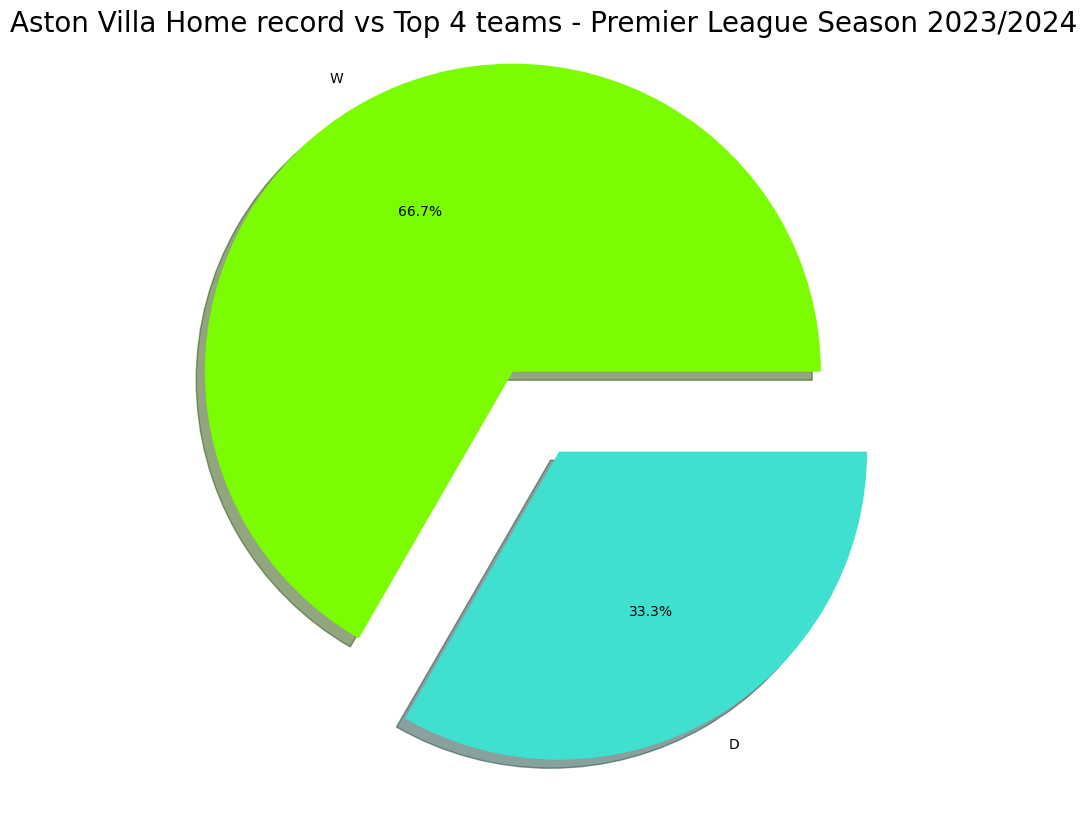

In [93]:
plt.style.use("default")

explode=(0.2,0.1)#,0.2)
labels=["W","D"]#,"L"]
percentages = RoundList

colours=["lawngreen","turquoise","lightcoral",]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

fig, ax = plt.subplots(figsize=(12, 10))
genre_distribution = ax.pie(RoundList,explode=explode,labels=labels,shadow=True,
                            autopct=lambda pct: func(pct, percentages),
                            textprops=dict(color="black"),colors=colours)


ax.set_title(Home_Team + " Home record vs Top 4 teams - " + Chosen_season, fontsize=20)

plt.show()